Last modified: Sept 1st, 2025


## Perpendicular modes dispersion relation 
#### [V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)


Author: Opal Issan (oissan@ucsd.edu)

In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../../../../')))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from QLT_equations.testperp import dispersion_relation

In [5]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Electrostatic perpendicular dispersion relation 

In [6]:
# normalization 
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
n_c = 4/5 # n^e_0
omega_0 = 0.5 # Omega_ce

omega_pe = 4 # Omgea_{ce}
alpha_perp_c = 0.0079 # d_e x Omega_ce
alpha_i =  alpha_perp_c / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * alpha_perp_c # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

In [7]:
k_perp = 150 
sol = scipy.optimize.newton(dispersion_relation(k_perp=k_perp, omega_pe=omega_pe, omega_0=omega_0, omega_pi=omega_pi,
                                                v_0=v_0, alpha_i=alpha_i, alpha_perp_c=alpha_perp_c, n_c=n_c),
                            omega_0*3 + 0.005j, maxiter=10000)
print("omega_k + i gamma = ", sol)
print("dispersion residual = ", abs(dispersion_relation(k_perp=k_perp, omega_pe=omega_pe, omega_0=omega_0, omega_pi=omega_pi,
                                                v_0=v_0, alpha_i=alpha_i, alpha_perp_c=alpha_perp_c, n_c=n_c)(sol)))

omega_k + i gamma =  (1.5939360279025996-3.5427795915356287e-07j)
dispersion residual =  1.8550924250945263e-10


In [8]:
k_perp_ = np.linspace(170, 250, 60)
sol_ = np.zeros(len(k_perp_), dtype="complex128")

In [9]:
for ii in range(len(k_perp_)):
    try:
        sol_[ii] = scipy.optimize.newton(dispersion_relation(k_perp=k_perp_[ii], omega_pe=omega_pe, omega_0=omega_0, omega_pi=omega_pi,
                                                v_0=v_0, alpha_i=alpha_i, alpha_perp_c=alpha_perp_c, n_c=n_c), 
                                         x0=omega_0*3 + 0.0005j, maxiter=10000)
        #print("dispersion residual = ", abs(disp_k(k_perp=k_perp_[ii])(sol_[ii])))
    except:
        print("An exception occurred")

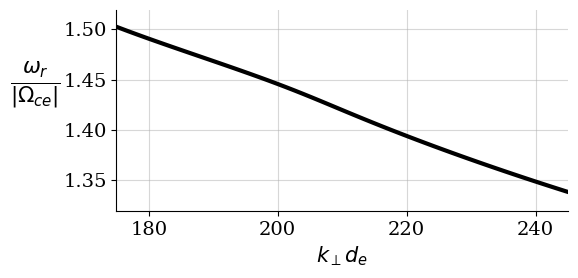

In [13]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(k_perp_, sol_.real, linewidth=3, color="black")
ax.set_ylabel(r'$\frac{\omega_r}{|\Omega_{ce}|}$', fontsize=22, labelpad=20, rotation=0)
ax.set_xlabel('$k_{\perp}d_{e}$', fontsize=15)
ax.set_xticks([180, 200, 220, 240])
ax.set_xlim(175, 245)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()

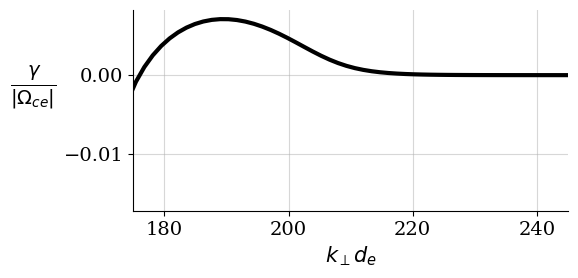

In [14]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(k_perp_, sol_.imag, linewidth=3, color="black")
ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', labelpad=22, rotation=0, fontsize=20)
ax.set_xlabel('$k_{\perp}d_{e}$', fontsize=15)
ax.set_xticks([180, 200, 220, 240])
#ax.set_ylim(-0.0001, 0.0075)
ax.set_xlim(175, 245)
#ax.set_yticks([0, 0.0025, 0.005, 0.0075])
#ax.set_yticklabels([0, 0.0025, 0.005, 0.0075])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()

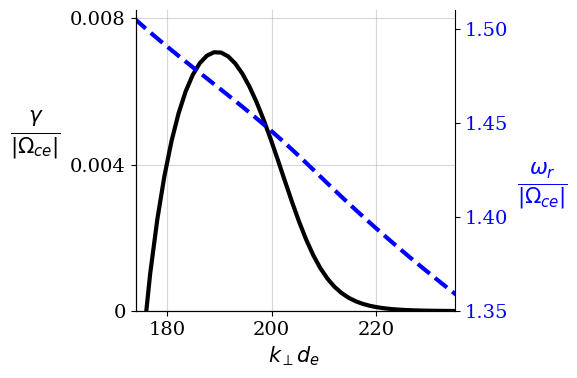

In [15]:
fig, ax1 = plt.subplots(figsize=(6, 4))

# plot on the left y-axis (ax1)
ax1.plot(k_perp_, sol_.imag, color="black", linewidth=3)
ax1.set_xlabel(r"$k_{\perp} d_{e}$ ", fontsize=15)
ax1.set_ylabel(r"$\gamma$", fontsize=17, color="black")
ax1.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', fontsize=22, labelpad=25, rotation=0, color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_yticks([0, 0.004, 0.008])
ax1.set_yticklabels(["0", "0.004", "0.008"])
ax1.set_ylim(0)
ax1.set_xlim(174, 235)

# create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(k_perp_, sol_.real, color="blue", ls="--", linewidth=3)
ax2.set_ylabel(r'$\frac{\omega_r}{|\Omega_{ce}|}$', fontsize=22, labelpad=25, rotation=0, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.spines['top'].set_visible(False)
ax2.set_yticks([1.5, 1.45, 1.4, 1.35])
ax2.set_ylim(1.35, 1.51)
#ax1.set_xticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])


# add grid and layout adjustments
ax1.grid(alpha=0.5)
fig.tight_layout()

# save the combined figure
plt.savefig("../../../../figs/manuscript/w_r_gamma_perp_dual_axis_low_anisotropy.png", dpi=300, bbox_inches='tight')